In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

In [3]:
#Loading the data

train_data_P = "./data/Train.csv"
test_data_P = "./data/Test.csv"
train_data = pd.read_csv(train_data_P).set_index("Item_Identifier")
test_data = pd.read_csv(test_data_P).set_index("Item_Identifier")

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8523 entries, FDA15 to DRG01
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 799.0+ KB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5681 entries, FDW58 to FDU37
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                4705 non-null   float64
 1   Item_Fat_Content           5681 non-null   object 
 2   Item_Visibility            5681 non-null   float64
 3   Item_Type                  5681 non-null   object 
 4   Item_MRP                   5681 non-null   float64
 5   Outlet_Identifier          5681 non-null   object 
 6   Outlet_Establishment_Year  5681 non-null   int64  
 7   Outlet_Size                4075 non-null   object 
 8   Outlet_Location_Type       5681 non-null   object 
 9   Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 488.2+ KB


In [6]:
Training_Outlet_Sales = train_data.Item_Outlet_Sales
data = pd.concat([train_data.drop(['Item_Outlet_Sales'], axis=1), test_data])

In [7]:
data.isnull().sum()

Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

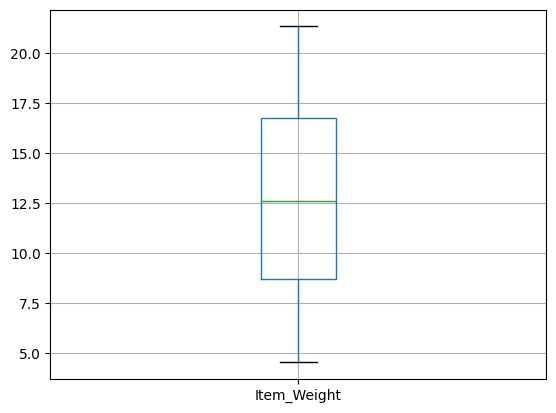

In [8]:
#Finding Outliers Before Handling Null Values
data.boxplot(column =["Item_Weight"])
plt.show()

In [9]:
#No outliers in the item weight so we would replace weight by the average weight
mean_weight = data["Item_Weight"].mean()
data["Item_Weight"].replace(np.nan,mean_weight, inplace = True)
data.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [10]:
#Outlet size is a categorical value, so we replace it with the mode value
mode_Outlet_Size = data["Outlet_Size"].mode().values[0]
data["Outlet_Size"].replace(np.nan, mode_Outlet_Size, inplace=True)
data.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [11]:
#Dropping Duplicates
data.drop_duplicates(inplace = True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14204 entries, FDA15 to FDU37
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                14204 non-null  float64
 1   Item_Fat_Content           14204 non-null  object 
 2   Item_Visibility            14204 non-null  float64
 3   Item_Type                  14204 non-null  object 
 4   Item_MRP                   14204 non-null  float64
 5   Outlet_Identifier          14204 non-null  object 
 6   Outlet_Establishment_Year  14204 non-null  int64  
 7   Outlet_Size                14204 non-null  object 
 8   Outlet_Location_Type       14204 non-null  object 
 9   Outlet_Type                14204 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 1.2+ MB


In [13]:
#Now Lets Check Values of Categorical Values
print(data['Item_Fat_Content'].unique())
print(data['Item_Type'].unique())
print(data['Outlet_Size'].unique())
print(data['Outlet_Location_Type'].unique())
print(data['Outlet_Type'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
['Medium' 'High' 'Small']
['Tier 1' 'Tier 3' 'Tier 2']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [14]:
#Notice that the data Item_Fat_Content has 2 categories only but written in different ways

data['Item_Fat_Content'].replace(['Low Fat', 'low fat'], 'LF', inplace = True)
data['Item_Fat_Content'].replace('Regular', 'reg', inplace = True)

In [15]:
data['Item_Fat_Content'].unique()

array(['LF', 'reg'], dtype=object)

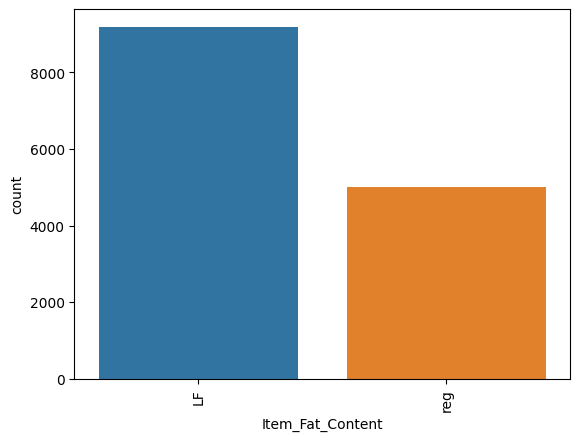

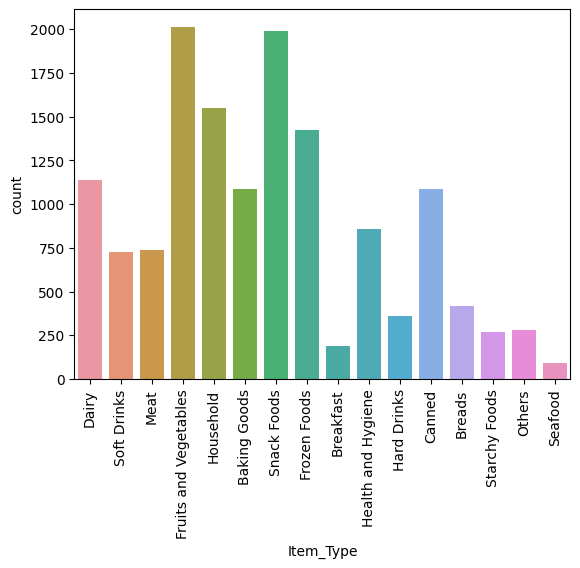

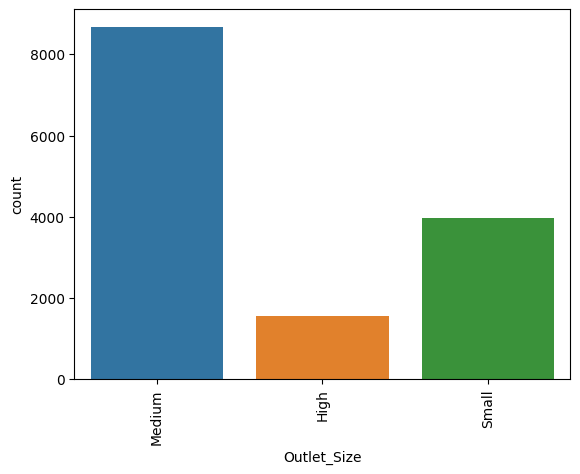

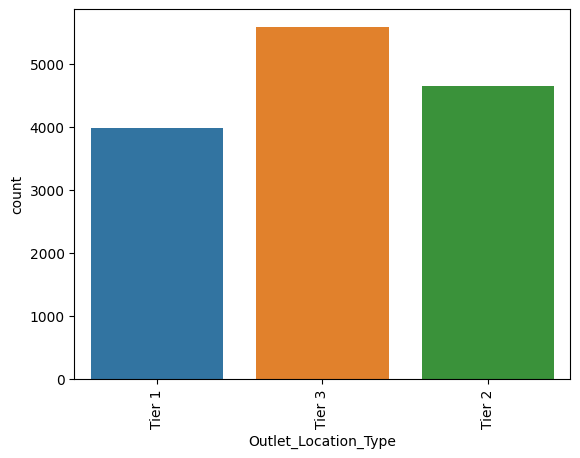

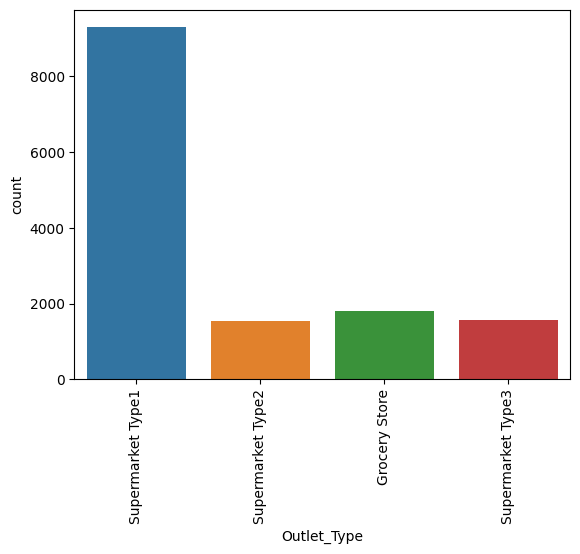

In [16]:
sns.countplot(x='Item_Fat_Content', data=data)
plt.xticks(rotation=90)
plt.show()

sns.countplot(x='Item_Type', data=data)
plt.xticks(rotation=90)
plt.show()

sns.countplot(x='Outlet_Size', data=data)
plt.xticks(rotation=90)
plt.show()

sns.countplot(x='Outlet_Location_Type', data=data)
plt.xticks(rotation=90)
plt.show()

sns.countplot(x='Outlet_Type', data=data)
plt.xticks(rotation=90)
plt.show()


In [17]:
#Now Let's Encode All the Categorical Data, We will use one-hot encoding wirh categories and Label Encoding for ordinal
Outlet_Type_Dumm = pd.get_dummies(data=data['Outlet_Type'], columns=['Outlet_Type'], dtype=np.int16)
Outlet_Type_New = pd.concat([data, Outlet_Type_Dumm], axis=1)
Outlet_Type_New

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Identifier,,,,,,,,,,,,,,
FDA15,9.30,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,0,1,0,0
DRC01,5.92,reg,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,0,0,1,0
FDN15,17.50,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,0,1,0,0
FDX07,19.20,reg,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,1,0,0,0
NCD19,8.93,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FDB58,10.50,reg,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,0,1,0,0
FDD47,7.60,reg,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,0,0,1,0
NCO17,10.00,LF,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,0,1,0,0


In [18]:
new = Outlet_Type_New
#Label Encoding Item Fat Content and Location Type, Outlet Size
new['Item_Fat_Content_Encoded'] = new['Item_Fat_Content'].replace({'LF':0, 'reg':1})
new['Outlet_Location_Type_Encoded'] = new['Outlet_Location_Type'].replace({'Tier 1': 1, 'Tier 2': 2, 'Tier 3': 3})
new['Outlet_Size_Encoded'] = new['Outlet_Size'].replace({'Small':1, 'Medium': 2, 'High':3})

#Because Item Type has so many catrgories so it's bad approach to use One-Hot encoding so we use fre1uency encoding
Item_Type_f = new['Item_Type'].value_counts(normalize=True)

new['Item_Type_f'] = new['Item_Type'].apply(lambda x : Item_Type_f[x])

Outlet_Establishment_Year_f = new['Outlet_Establishment_Year'].value_counts(normalize=True)

new['Est_Year_f'] = new['Outlet_Establishment_Year'].apply(lambda x : Outlet_Establishment_Year_f[x])
new


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Item_Fat_Content_Encoded,Outlet_Location_Type_Encoded,Outlet_Size_Encoded,Item_Type_f,Est_Year_f
Item_Identifier,,,,,,,,,,,,,,,,,,,
FDA15,9.30,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,0,1,0,0,0,1,2,0.079977,0.109124
DRC01,5.92,reg,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,0,0,1,0,1,3,2,0.051112,0.108843
FDN15,17.50,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,0,1,0,0,0,1,2,0.051816,0.109124
FDX07,19.20,reg,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,1,0,0,0,1,3,2,0.141721,0.065123
NCD19,8.93,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,0,1,0,0,0,3,3,0.108983,0.109335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FDB58,10.50,reg,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,0,1,0,0,1,1,1,0.140031,0.109124
FDD47,7.60,reg,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,0,0,1,0,1,3,2,0.018938,0.108843
NCO17,10.00,LF,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,0,1,0,0,0,2,2,0.060406,0.108983


In [19]:
#Normalize MRP
max_MRP = new['Item_MRP'].max()
min_MRP = new['Item_MRP'].min()
range_MRP = max_MRP-min_MRP

new['Normalized_MRP'] = (new['Item_MRP']-min_MRP)/range_MRP
new

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Item_Fat_Content_Encoded,Outlet_Location_Type_Encoded,Outlet_Size_Encoded,Item_Type_f,Est_Year_f,Normalized_MRP
Item_Identifier,,,,,,,,,,,,,,,,,,,,
FDA15,9.30,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,0,1,0,0,0,1,2,0.079977,0.109124,0.927507
DRC01,5.92,reg,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,0,0,1,0,1,3,2,0.051112,0.108843,0.072068
FDN15,17.50,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,0,1,0,0,0,1,2,0.051816,0.109124,0.468288
FDX07,19.20,reg,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,1,0,0,0,1,3,2,0.141721,0.065123,0.640093
NCD19,8.93,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,0,1,0,0,0,3,3,0.108983,0.109335,0.095805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FDB58,10.50,reg,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,0,1,0,0,1,1,1,0.140031,0.109124,0.467004
FDD47,7.60,reg,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,0,0,1,0,1,3,2,0.018938,0.108843,0.585126
NCO17,10.00,LF,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,0,1,0,0,0,2,2,0.060406,0.108983,0.371199


In [20]:
new_data = new

In [23]:
Training_Outlet_Sales.size

8523

In [25]:
new_train_data = new.iloc[:Training_Outlet_Sales.size]
new_test_data = new.iloc[Training_Outlet_Sales.size:]

In [26]:
new_train_data = new_train_data.drop(['Item_Fat_Content', 'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year','Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'], axis = 1)
new_train_data

,Item_Weight,Item_Visibility,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Item_Fat_Content_Encoded,Outlet_Location_Type_Encoded,Outlet_Size_Encoded,Item_Type_f,Est_Year_f,Normalized_MRP
Item_Identifier,,,,,,,,,,,,
FDA15,9.300,0.016047,0,1,0,0,0,1,2,0.079977,0.109124,0.927507
DRC01,5.920,0.019278,0,0,1,0,1,3,2,0.051112,0.108843,0.072068
FDN15,17.500,0.016760,0,1,0,0,0,1,2,0.051816,0.109124,0.468288
FDX07,19.200,0.000000,1,0,0,0,1,3,2,0.141721,0.065123,0.640093
NCD19,8.930,0.000000,0,1,0,0,0,3,3,0.108983,0.109335,0.095805
...,...,...,...,...,...,...,...,...,...,...,...,...
FDF22,6.865,0.056783,0,1,0,0,0,3,3,0.140031,0.109335,0.777729
FDS36,8.380,0.046982,0,1,0,0,1,2,2,0.076457,0.108983,0.326263
NCJ29,10.600,0.035186,0,1,0,0,0,2,1,0.060406,0.109124,0.228492


In [27]:
new_test_data = new_test_data.drop(['Item_Fat_Content', 'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year','Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'], axis = 1)
new_test_data

,Item_Weight,Item_Visibility,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Item_Fat_Content_Encoded,Outlet_Location_Type_Encoded,Outlet_Size_Encoded,Item_Type_f,Est_Year_f,Normalized_MRP
Item_Identifier,,,,,,,,,,,,
FDW58,20.750000,0.007565,0,1,0,0,0,1,2,0.140031,0.109124,0.325012
FDW14,8.300000,0.038428,0,1,0,0,1,2,2,0.079977,0.108631,0.237819
NCN55,14.600000,0.099575,1,0,0,0,0,3,2,0.019713,0.065123,0.893316
FDQ58,7.315000,0.015388,0,1,0,0,0,2,2,0.140031,0.108631,0.525233
FDY38,12.792854,0.118599,0,0,0,1,1,3,2,0.079977,0.171712,0.861381
...,...,...,...,...,...,...,...,...,...,...,...,...
FDB58,10.500000,0.013496,0,1,0,0,1,1,1,0.140031,0.109124,0.467004
FDD47,7.600000,0.142991,0,0,1,0,1,3,2,0.018938,0.108843,0.585126
NCO17,10.000000,0.073529,0,1,0,0,0,2,2,0.060406,0.108983,0.371199


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

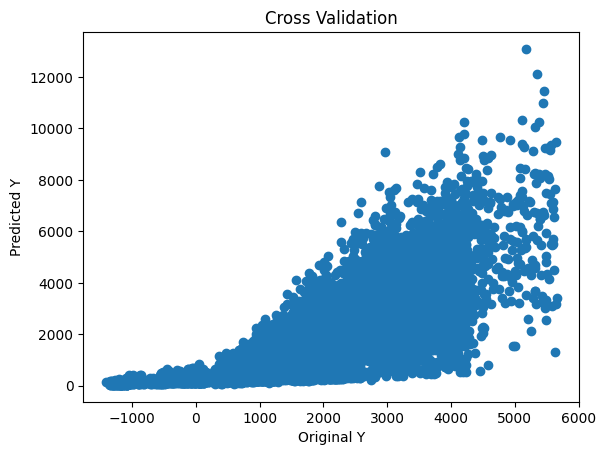

In [32]:
y_train = Training_Outlet_Sales
x_train = new_train_data
x_test = new_test_data



regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_predict = regressor.predict(x_train)

plt.scatter(y_predict, y_train)
plt.xlabel('Original Y')
plt.ylabel('Predicted Y')
plt.title("Cross Validation")
plt.show()

In [37]:
print(regressor.score(x_train, y_train)*100)

56.238813866339065


In [38]:
y_predict.size

8523

In [269]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 2.3 MB/s eta 0:00:00m eta 0:00:010:00:03
You should consider upgrading via the '/media/ezzedinayman/Local Disk/Machine Learning/Technocolab/TechnoColabEnv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [41]:
#Trying XGBoost Model
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

model_xg = XGBRegressor()

#HyperParameter Tuning in XG
param_grid = {'learning_rate': [0.1,0.01,0.001]}

grid_search = GridSearchCV(estimator=model, param_grid = param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Hyperparameters:  {'learning_rate': 0.1}
Best Score:  0.5723361007416913


In [42]:
model_xg.learning_rate=0.1
model_xg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

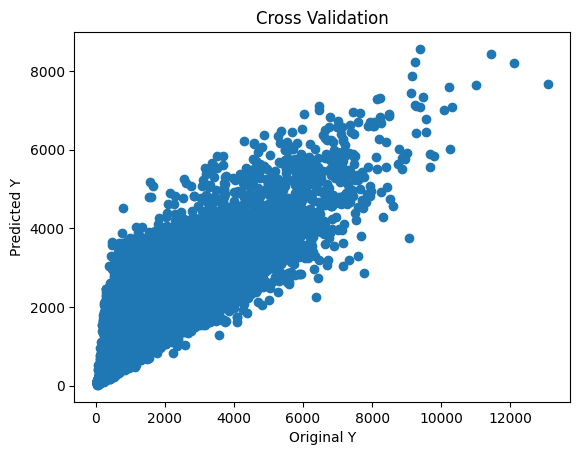

In [45]:
y_predict_xg = model_xg.predict(x_test)
y_train_xg = model_xg.predict(x_train)

plt.scatter(y_train, y_train_xg)
plt.xlabel('Original Y')
plt.ylabel('Predicted Y')
plt.title("Cross Validation")
plt.show()

In [46]:
model_xg.score(x_train,y_train)

0.7161556890624188

In [52]:
#Using Scalers
from sklearn.preprocessing import StandardScaler, RobustScaler

scaler = StandardScaler()
x_scaled_std = scaler.fit_transform(x_train)

x_test_std = scaler.fit_transform(x_test)
x_test_std = pd.DataFrame(x_test_std, columns=x_test.columns)

x_scaled_std = pd.DataFrame(x_scaled_std, columns = x_train.columns)
x_scaled_std




,Item_Weight,Item_Visibility,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Item_Fat_Content_Encoded,Outlet_Location_Type_Encoded,Outlet_Size_Encoded,Item_Type_f,Est_Year_f,Normalized_MRP
0,-0.839226,-0.970732,-0.381529,0.726802,-0.349551,-0.351028,-0.738147,-1.369334,0.284581,-0.287590,-0.287249,1.747454
1,-1.639047,-0.908111,-0.381529,-1.375891,2.860816,-0.351028,1.354743,1.091569,0.284581,-1.019420,-0.297618,-1.489023
2,1.101168,-0.956917,-0.381529,0.726802,-0.349551,-0.351028,-0.738147,-1.369334,0.284581,-1.001570,-0.287249,0.010040
3,1.503445,-1.281758,2.621031,-1.375891,-0.349551,-0.351028,1.354743,1.091569,0.284581,1.277810,-1.907343,0.660050
4,-0.926780,-1.281758,-0.381529,0.726802,-0.349551,-0.351028,-0.738147,1.091569,1.950437,0.447809,-0.279473,-1.399220
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.415428,-0.181193,-0.381529,0.726802,-0.349551,-0.351028,-0.738147,1.091569,1.950437,1.234972,-0.279473,1.180783
8519,-1.056929,-0.371154,-0.381529,0.726802,-0.349551,-0.351028,1.354743,-0.138882,0.284581,-0.376838,-0.292433,-0.527301
8520,-0.531602,-0.599784,-0.381529,0.726802,-0.349551,-0.351028,-0.738147,-0.138882,-1.381274,-0.783806,-0.287249,-0.897208
8521,-1.333790,1.532880,-0.381529,-1.375891,2.860816,-0.351028,1.354743,1.091569,0.284581,1.234972,-0.297618,-0.607977


In [53]:
#XGBoost After Scaling
model_ss = XGBRegressor()


grid_search = GridSearchCV(estimator=model_ss, param_grid = param_grid, cv=5)
grid_search.fit(x_scaled_std, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Hyperparameters:  {'learning_rate': 0.1}
Best Score:  0.5723798632101064


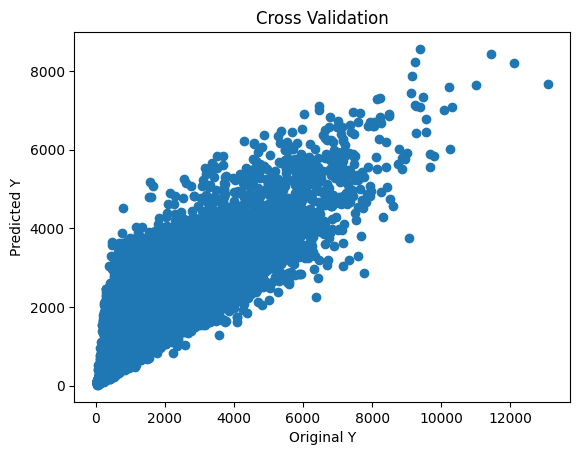

In [54]:
model_ss.learning_rate = 0.1
model_ss.fit(x_scaled_std, y_train)


y_train_xg_ss = model_ss.predict(x_scaled_std)


plt.scatter(y_train, y_train_xg_ss)
plt.xlabel('Original Y')
plt.ylabel('Predicted Y')
plt.title("Cross Validation")
plt.show()

In [57]:
model_ss.score(x_scaled_std, y_train)

0.7161556890624188

In [58]:
##Using Robust Scaler

scaler = RobustScaler()
x_scaled_r = scaler.fit_transform(x_train)
x_scaled_r = pd.DataFrame(x_scaled_r, columns = x_train.columns)

x_test_rs = scaler.fit_transform(x_test)
x_test_rs = pd.DataFrame(x_test_rs, columns = x_test.columns)

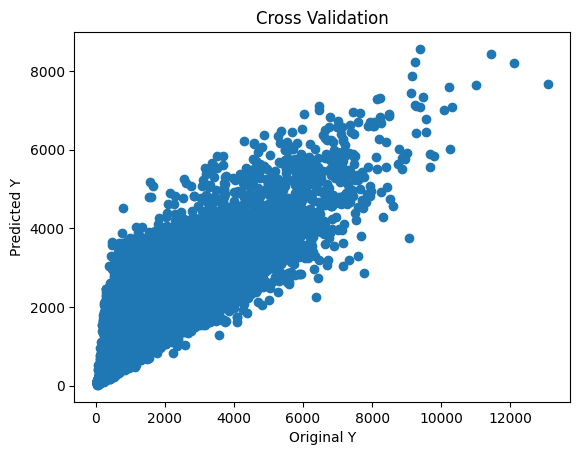

In [59]:
model_rs = XGBRegressor()
model_rs.learning_rate = 0.1
model_rs.fit(x_scaled_r, y_train)


y_train_xg_rs = model_rs.predict(x_scaled_r)


plt.scatter(y_train, y_train_xg_rs)
plt.xlabel('Original Y')
plt.ylabel('Predicted Y')
plt.title("Cross Validation")
plt.show()

In [60]:
model_rs.score(x_scaled_r, y_train)

0.7161556890624188

# Insights
## Robust Scaler achieved better accuracy than Standard Scaler So Let's assume we take the predicted y_test from RobustScaled XGBoost Model

In [61]:
#Concatenating Results to the original test dataframe
y_predict_xg_rs = model_rs.predict(x_test_rs)
test_data['Predicted_Outlet_Sales'] = y_predict_xg_rs
test_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Predicted_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1572.779419
FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,1410.802002
NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,580.313599
FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,2640.520508
FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,5642.029785
...,...,...,...,...,...,...,...,...,...,...,...
FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2140.937256
FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,2884.024414
NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,1871.132080


In [62]:
#Saving The Model
import pickle as pck

with open("myModel.pkl", 'wb') as myfile:
    pck.dump(model_rs, myfile)
    
#Saving the CSV DATA
test_data.to_csv("Predicted Sales.csv", index=True)